Target Value Distribution:
Quality of Sleep
4.0     262
5.0    1082
6.0    2573
7.0    3233
8.0    2035
9.0     814
Name: count, dtype: int64


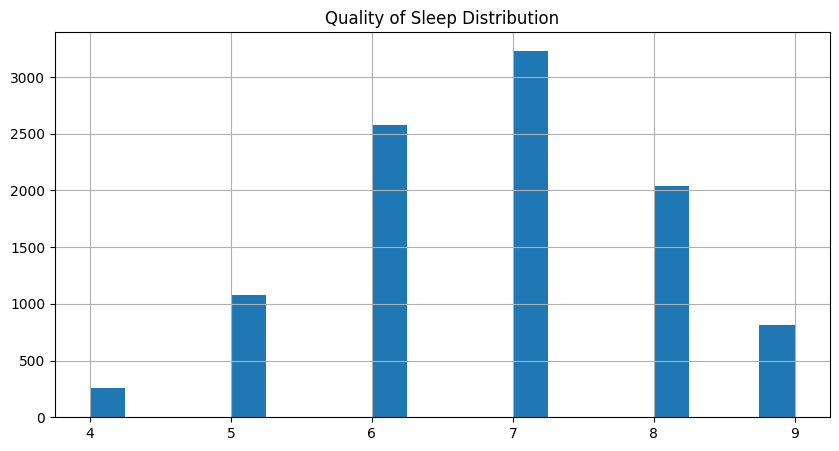

MAE: 0.98
R2 Score: -0.03

Feature Importances:
          Feature  Importance
5     Daily Steps    0.391575
0             Age    0.186512
4      Heart Rate    0.151116
2     Systolic BP    0.105888
3    Diastolic BP    0.097369
1  Sleep Duration    0.067539


In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("modified_sleep_dataset.csv")

# 1. Check target distribution
print("Target Value Distribution:")
print(df['Quality of Sleep'].value_counts().sort_index())
plt.figure(figsize=(10,5))
df['Quality of Sleep'].hist(bins=20)
plt.title('Quality of Sleep Distribution')
plt.show()

# 2. Feature selection
features = [
    "Age", 
    "Sleep Duration", 
    "Systolic BP", 
    "Diastolic BP", 
    "Heart Rate", 
    "Daily Steps"  
]
target = 'Quality of Sleep'

# 3. Clean data
df = df.dropna(subset=features+[target])
df = df.drop_duplicates()

X = df[features]
y = df[target]

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train model with optimized parameters
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
model.fit(X_train, y_train)

# 6. Evaluate
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

# 7. Check feature importance
importances = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nFeature Importances:")
print(importances)


In [3]:
import joblib


joblib.dump(model, 'model.pkl')


['model.pkl']

In [4]:
import pickle

# List of features IN THE EXACT ORDER used for training
features = [
    "Age", 
    "Sleep Duration", 
    "Systolic BP", 
    "Diastolic BP", 
    "Heart Rate", 
    "Daily Steps"         
]

# Save the feature list
with open('model_features.pkl', 'wb') as f:
    pickle.dump(features, f)

In [17]:
pip install scikit-learn


     ---------------------------------------- 11.1/11.1 MB 2.0 MB/s eta 0:00:00
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
